# "Оконные функции"

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

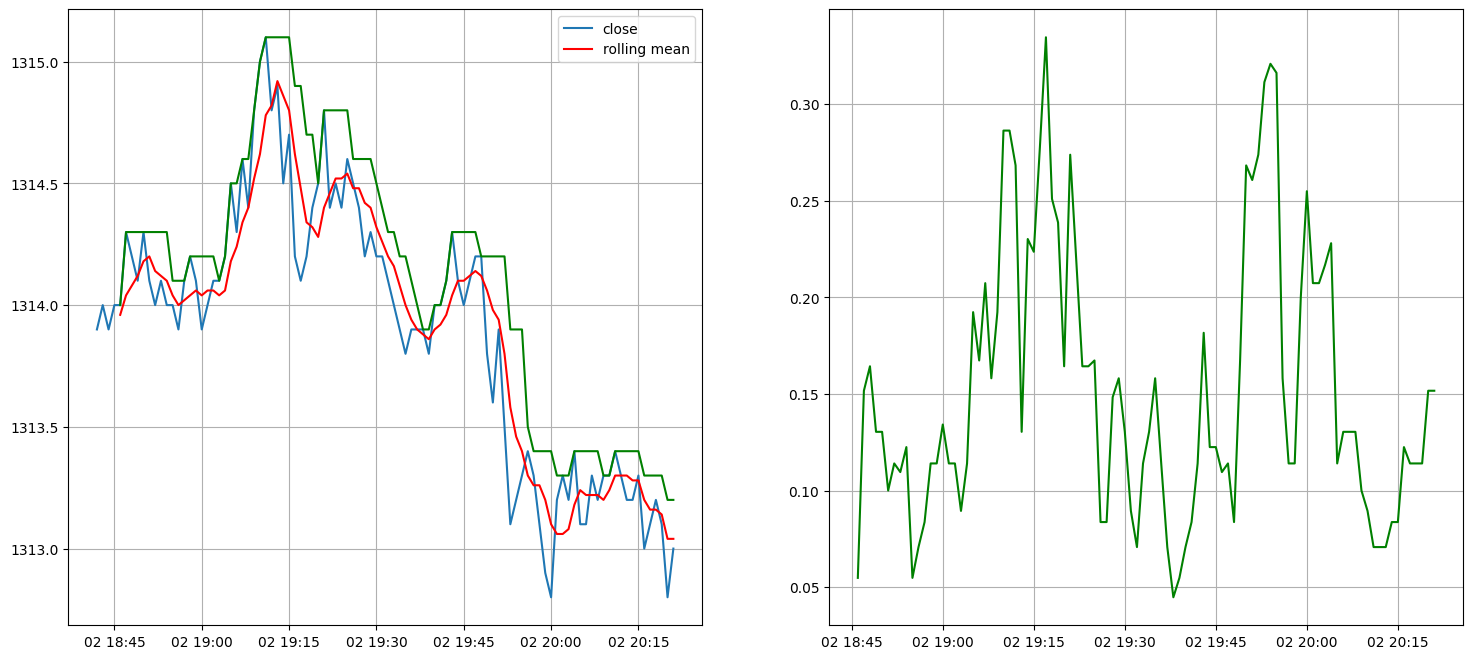

,ts,open,high,low,close,vol,rolling_mean,rolling_std,rolling_max
0,2018-01-02 18:42:00,1314.3,1314.4,1313.9,1313.9,323,NaN,NaN,NaN
1,2018-01-02 18:43:00,1314.0,1314.2,1314.0,1314.0,177,NaN,NaN,NaN
2,2018-01-02 18:44:00,1314.0,1314.0,1313.7,1313.9,216,NaN,NaN,NaN
3,2018-01-02 18:45:00,1313.9,1314.1,1313.8,1314.0,170,NaN,NaN,NaN
4,2018-01-02 18:46:00,1314.0,1314.1,1314.0,1314.0,186,1313.96,0.054772,1314.0
5,2018-01-02 18:47:00,1314.0,1314.3,1314.0,1314.3,99,1314.04,0.151658,1314.3
6,2018-01-02 18:48:00,1314.3,1314.4,1314.2,1314.2,99,1314.08,0.164317,1314.3
7,2018-01-02 18:49:00,1314.2,1314.2,1314.1,1314.1,113,1314.12,0.130384,1314.3
8,2018-01-02 18:50:00,1314.2,1314.3,1314.1,1314.3,129,1314.18,0.130384,1314.3
9,2018-01-02 18:51:00,1314.4,1314.4,1314.1,1314.1,139,1314.20,0.100000,1314.3


In [2]:
df = pd.read_csv('./data/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1000:1100]
df = df.reset_index(drop=True)

def myMax(value):
    return max(value)

## делаем оконное среднее с окном в 10 точек
df['rolling_mean'] = df.close.rolling(window=5).mean()
df['rolling_std']  = df.close.rolling(window=5).std()
df['rolling_max']  = df.close.rolling(window=5).apply(myMax, raw=False)

## визуализируем
f, ax = plt.subplots(1, 2, figsize=(18, 8))
ax[0].plot(df.ts, df.close) ## исходные данные
ax[0].plot(df.ts, df.rolling_mean, c='r') ## оконное среднее
ax[0].plot(df.ts, df.rolling_max,  c='g') ## оконный максимум
ax[0].legend(['close', 'rolling mean'])
ax[0].grid()

ax[1].plot(df.ts, df.rolling_std, c='g') ## оконное стандартное отклонение
ax[1].grid()
plt.show()

df.head(12)

# Cкользящее среднее

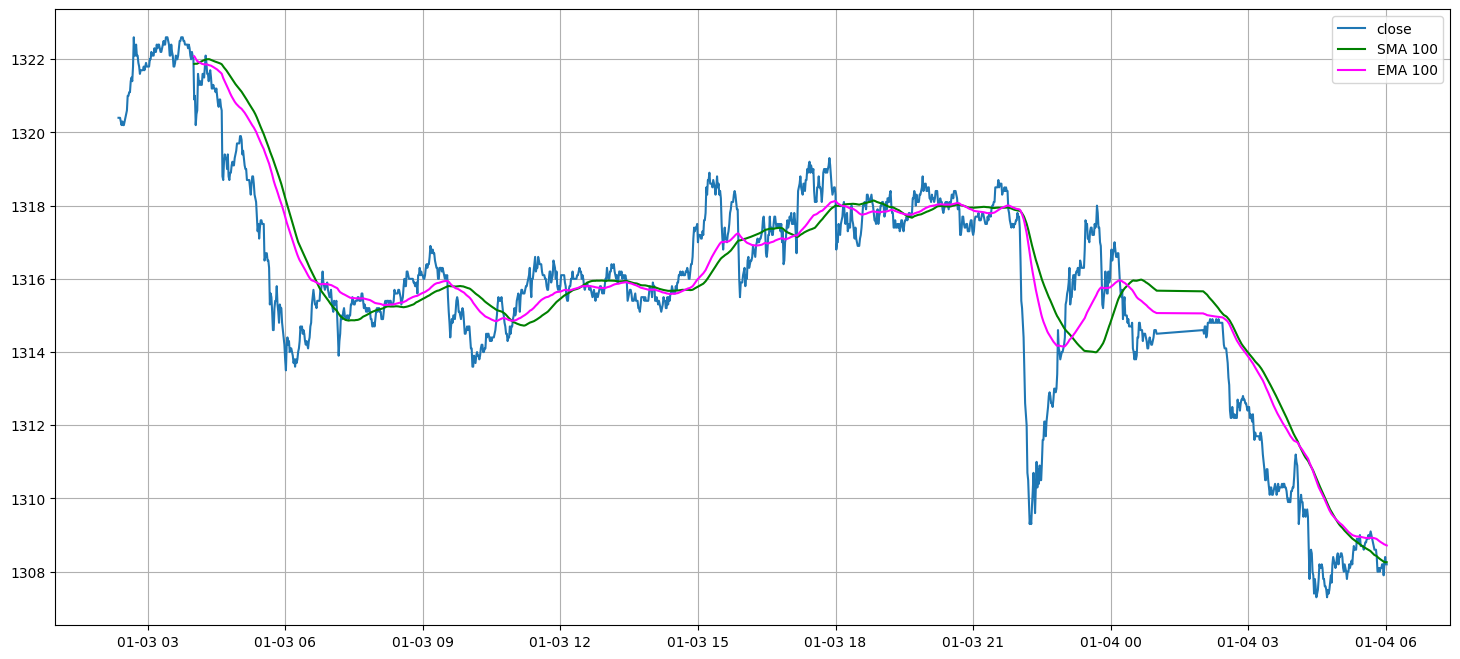

In [3]:
df = pd.read_csv('./data/gold_clean.csv')
df['ts'] = pd.to_datetime(df.ts)
df = df.iloc[1400:3000]

N = 100

## делаем оконное среднее с окном в N точек
df['rolling_mean_' + str(N)] = df.close.rolling(window=N).mean()
## экспоненциально среднее с окном в N точек
df['rolling_ema_' + str(N)] = df.close.ewm(min_periods=N, span=N).mean()

## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
# ax.plot(df.ts, df.rolling_mean_10, c='r') ## оконное среднее
ax.plot(df.ts, df['rolling_mean_' + str(N)],  c='g') ## оконное среднее
ax.plot(df.ts, df['rolling_ema_'  + str(N)],  c='magenta') ## оконное среднее
ax.legend(['close', 'SMA ' + str(N), 'EMA ' + str(N)])
ax.grid()

# Лаги

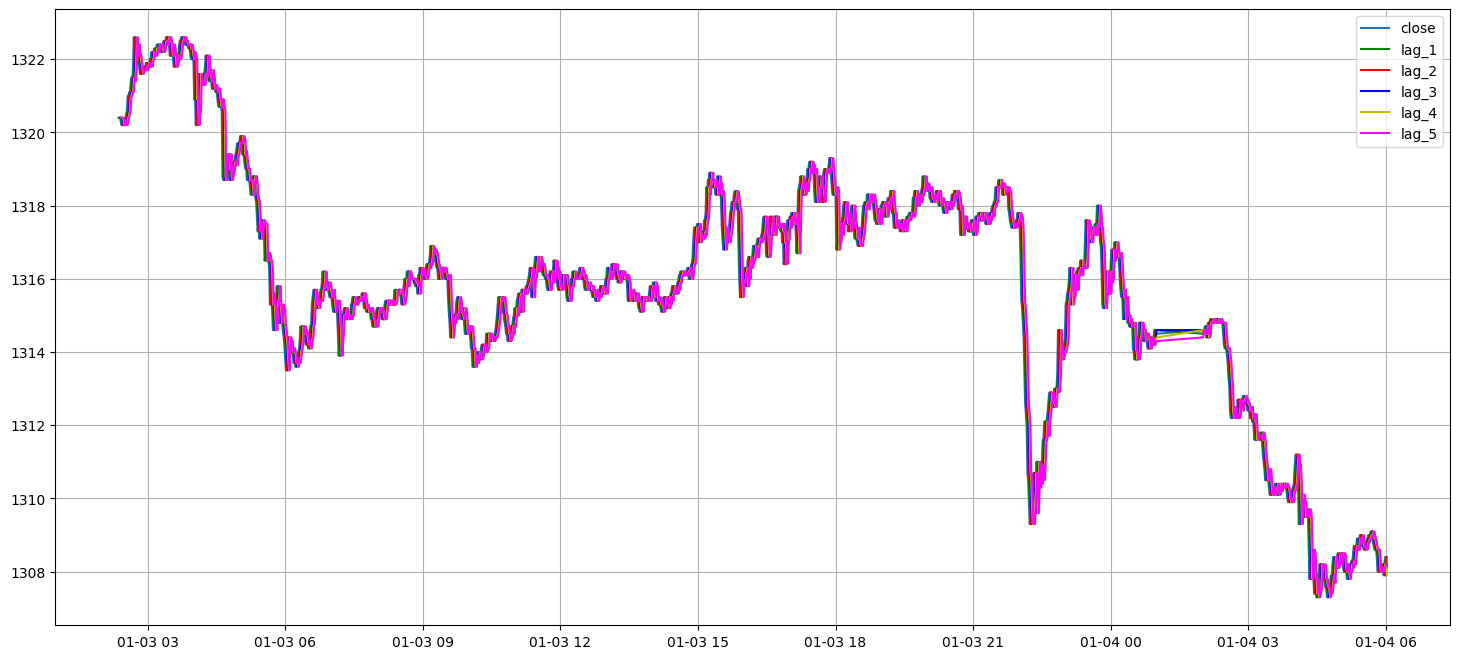

In [4]:
for i in range(1,6):
    df['lag_{}'.format(i)] = df.close.shift(i)


## визуализируем
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts, df.close) ## исходные данные
ax.plot(df.ts, df['lag_' + str(1)],  c='g') 
ax.plot(df.ts, df['lag_' + str(2)],  c='r') 
ax.plot(df.ts, df['lag_' + str(3)],  c='b') 
ax.plot(df.ts, df['lag_' + str(4)],  c='y') 
ax.plot(df.ts, df['lag_' + str(5)],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()

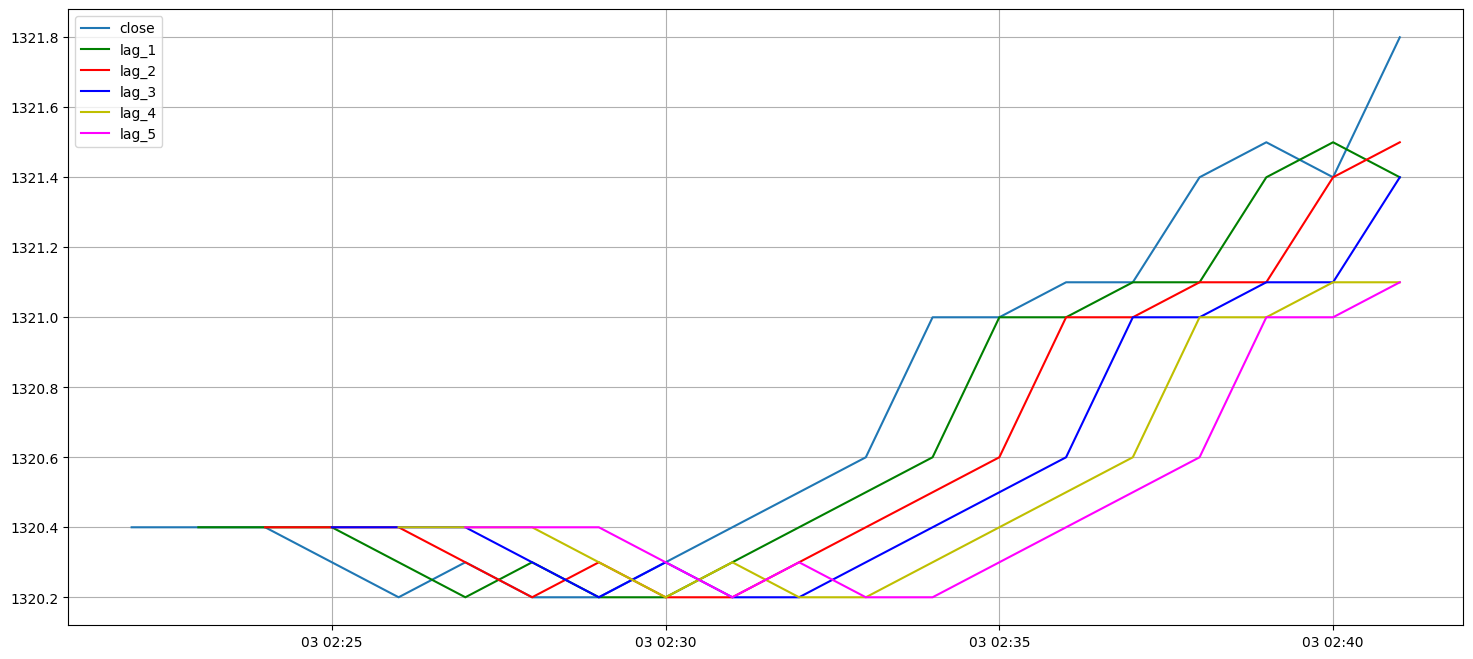

In [5]:
f, ax = plt.subplots(1, 1, figsize=(18, 8))
ax.plot(df.ts[:20], df.close[:20]) ## исходные данные
ax.plot(df.ts[:20], df['lag_' + str(1)][:20],  c='g') 
ax.plot(df.ts[:20], df['lag_' + str(2)][:20],  c='r') 
ax.plot(df.ts[:20], df['lag_' + str(3)][:20],  c='b') 
ax.plot(df.ts[:20], df['lag_' + str(4)][:20],  c='y') 
ax.plot(df.ts[:20], df['lag_' + str(5)][:20],  c='magenta') 
ax.legend(['close', 'lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'])
ax.grid()